# Map of Kotlin Island with Inset

Kotlin Island is situated in the Gulf of Finland and is one of the districts of the city of Saint Petersburg (Russia).


In [1]:
import geopandas as gpd
from shapely.geometry import box

from lets_plot import *


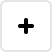
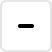
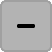
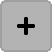
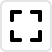
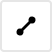
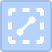
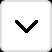
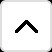
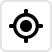
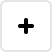
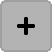
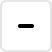
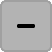
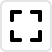
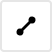
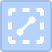
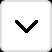
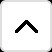
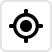

In [2]:
LetsPlot.setup_html()

#### All Districts of St.Petersburg

In [3]:
# The districts boundaries.
districts_gdf = gpd.read_file("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/spb_districts.geojson")
districts_gdf.head(3)

osm_id                                           geometry
0  1115082  MULTIPOLYGON (((29.54289 60.04227, 29.54305 60...
1  1114193  MULTIPOLYGON (((30.25023 59.90129, 30.25112 59...
2  1114252  MULTIPOLYGON (((30.18468 59.95472, 30.18449 59...

In [4]:
# Kotlin Island bounding box.
kotlin_bbox = [29.63, 59.965, 29.815, 60.035]
kotlin_rect = dict(zip(['xmin', 'ymin', 'xmax', 'ymax'], kotlin_bbox))


In [5]:
p_districts = (ggplot()
    + geom_polygon(map=districts_gdf, color='#a1d99b', fill='#f7fcf5')
    + geom_rect(**kotlin_rect, color='red', alpha=0)
    + geom_text(label='Saint Petersburg', x=30.334445, y=59.934294, size=6)
    + theme_void() + theme(plot_inset=0, plot_background=element_rect(size=1))
)

p_districts + coord_map()

#### Detailed Map of Kotlin Island


In [6]:
# Tourist attractions with coordinates.
places_gdf = gpd.read_file("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/kotlin_places.geojson")
places_gdf.head(3)

name    type                   geometry
0  Kronstadt Naval Cathedral  church  POINT (29.77745 59.99174)
1   Kronstadt History Museum  museum  POINT (29.79132 59.98678)
2     Kronstadt Naval Museum  museum  POINT (29.76342 59.99611)

In [7]:
p_kotlin_isl = (ggplot()
    # Zoom-in the map.             
    + coord_cartesian(xlim=kotlin_bbox[0::2], ylim=kotlin_bbox[1::2])
    + geom_polygon(map=districts_gdf, color='#31a354', fill='#e5f5e0')
                
    # Add the points of interest.            
    + geom_point(aes(color='type', shape='type'), data=places_gdf, size=5)
    + geom_text(aes(label='name'), data=places_gdf, hjust='right', nudge_x=-5, nudge_unit='size')

    # Add annotation texts.            
    + geom_text(label='Kotlin Isl.', x=29.725, y=60.011, color='#31a354', size=13, fontface='italic')
    + geom_text(label='Gulf of Finland', x=29.665, y=60.002, color='#578bcc', size=11, fontface='italic')
                
    + theme_void() + theme(
        plot_background=element_rect(fill='#F0F7FE', size=1),
        plot_inset=0,
        legend_title='blank',
        legend_position=[.1, .12],
        legend_background='blank'
    )
)               
p_kotlin_isl

#### Combining Both Plots in One Figure

In [8]:
(ggbunch([p_kotlin_isl, p_districts],
    regions=[
        (0, 0, 1, 1),
        (0.75, 0, 0.25, 0.37, -10, 10)
    ]) 
  + ggtitle('Tourist Attractions on Kotlin Island')
  + theme(plot_title=element_text(hjust=0.5, face='bold', size=16))
)             
